<a href="https://colab.research.google.com/github/hyojk2001/Python-Based-Data-Analysis/blob/main/0614_mlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

sess = tf.Session()
hello = tf.constant('Hello')
print(sess.run(hello))

# tensorflow version 1.XXX 대의 문법..
# 지금은 2.5까지 나와있다

AttributeError: ignored

In [2]:
# 2.XX 대 tensorflow 문법
import tensorflow as tf

with tf.compat.v1.Session() as sess:
  # sess = tf.Session()
  hello = tf.constant('kim hyojoong')
  ans = sess.run(hello)
  print(ans)



b'kim hyojoong'


In [3]:
tf.__version__

'2.5.0'

In [4]:
import tensorflow as tf
import numpy as np

x = np.random.sample((100,3))
dataset = tf.data.Dataset.from_tensor_slices(x)

In [5]:
import tensorflow_datasets as tfds

# 내장 데이터셋의 사용
ds = tfds.load('mnist', split='train', shuffle_files=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
# 케라스에서 제공하는 데이터셋 사용
data_train, data_test = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
# 인터넷에서 데이터셋을 로컬컴퓨터에 내려받아 사용

url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/butler.txt'
text_path = tf.keras.utils.get_file("butler.txt", origin=url)

811008/807992 [==============================] - 0s 0us/step


In [8]:
from tensorflow.keras import models
model = tf.keras.Sequential()

In [9]:
log_dir = 'logs/fit/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

model.fit(
    x = x_train,
    y = y_train,
    epochs = 5,
    validation_Data = (x_test, y_test),
    callbacks = [tensorboard_callback]
)

NameError: ignored

In [10]:
############################

In [13]:
import pandas as pd   # 데이터 분석용 라이브러리
import numpy as np    # 계산 라이브러리
import tensorflow as tf   # 머신러닝을 위한 텐서플로우 라이브러리
import matplotlib.pyplot as plt   # 그래프를 그리기 위한 그래프 라이브러리
%matplotlib inline    
# 웹 상에서 그림을 잘 그리기
import seaborn as sns   # 그림을 보다 이쁘게 그리는 라이브러리

sns.set(style='darkgrid')

In [16]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

In [17]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


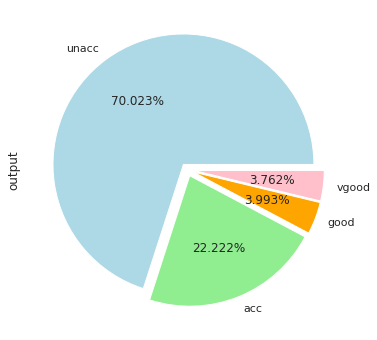

In [19]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.03f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05,0.05,0.05,0.05))

In [21]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values     # 레이블을 넘파이의 배열로 변환

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout   # ------ 케라스 API를 이용하여 Input, Dense, Activation, Drop 클래스를 호출
from tensorflow.keras.models import Model       # ------ 역시 케라스 API를 이용하여 Model 클래스 호출

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)   # 노드 15개 + 렐루 활성화함수
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)   # 노드 10개 + 렐루 활성화함수
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)   # 노드 4개 + 소프트맥스 활성화 함수

model = Model(inputs=input_layer, outputs=output)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 1s 4ms/step - loss: 1.0668 - acc: 0.5937 - val_loss: 0.8751 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.6749 - acc: 0.7213 - val_loss: 0.7293 - val_acc: 0.6534
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.5342 - acc: 0.7466 - val_loss: 0.6001 - val_acc: 0.7148
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4157 - acc: 0.8253 - val_loss: 0.4995 - val_acc: 0.7870
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3364 - acc: 0.8715 - val_loss: 0.4227 - val_acc: 0.8303
Epoch 6/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2855 - acc: 0.8923 - val_loss: 0.3695 - val_acc: 0.8628
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2475 - acc: 0.8995 - val_loss: 0.3279 - val_acc: 0.8700
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

In [26]:
# 정확도
score = model.evaluate(X_test, y_test, verbose=1)
print('Test score : ', score[0])
print('Test accuracy : ', score[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0765 - acc: 0.9653
Test score :  0.07651098817586899
Test accuracy :  0.9653179049491882
